In [4]:
from utils import load_dtrajs_from_npz
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='serif')
%matplotlib inline

raw_dtrajs_abl = load_dtrajs_from_npz('abl_11400_2000_t_dtrajs.npz')
raw_dtrajs_src = load_dtrajs_from_npz('src_11401_2000_t_dtrajs.npz')

def trim_dtrajs(dtrajs,length_to_discard=10,min_length=100):
    trimmed = [traj[length_to_discard:] for traj in dtrajs if len(traj)>length_to_discard]
    return trimmed

dtrajs_abl = trim_dtrajs(raw_dtrajs_abl)
dtrajs_src = trim_dtrajs(raw_dtrajs_src)

def create_overlap_matrix(dtrajs):
    overlap_matrix = np.zeros((len(dtrajs),len(dtrajs)))

    sets = [set(traj) for traj in dtrajs]

    for i in range(len(overlap_matrix)):
        for j in range(len(overlap_matrix)):
            overlap_matrix[i,j] = len(sets[i].intersection(sets[j]))
    
    return overlap_matrix

overlap_matrix_abl = create_overlap_matrix(dtrajs_abl)
overlap_matrix_src = create_overlap_matrix(dtrajs_src)

In [7]:
import simtk.unit as u
(sum([len(t) for t in raw_dtrajs_abl])*250*u.picosecond).value_in_unit(u.millisecond)

0.20393925000000002

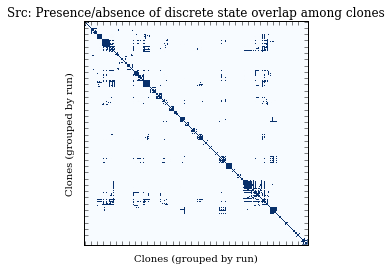

In [2]:
def plot_binary_overlap_matrix(overlap_matrix,name='Abl'):
    plt.imshow(overlap_matrix>0,interpolation='none',cmap='Blues');
    #plt.colorbar()
    plt.xlabel('Clones (grouped by run)')
    plt.ylabel('Clones (grouped by run)')
    plt.title(name+': Presence/absence of discrete state overlap among clones')
    ticks = [20*i for i in range((len(overlap_matrix)+1)/20)]
    labels = ['']*len(ticks)
    plt.xticks(ticks,labels)
    plt.yticks(ticks,labels)
    plt.grid(linestyle='-',color='grey',alpha=0.1)

plot_binary_overlap_matrix(overlap_matrix_abl,'Abl')
plt.savefig('overlap_matrix_abl.jpg',dpi=300)
plt.close()

plot_binary_overlap_matrix(overlap_matrix_src,'Src')
plt.grid(False)
plt.savefig('overlap_matrix_src.jpg',dpi=300)

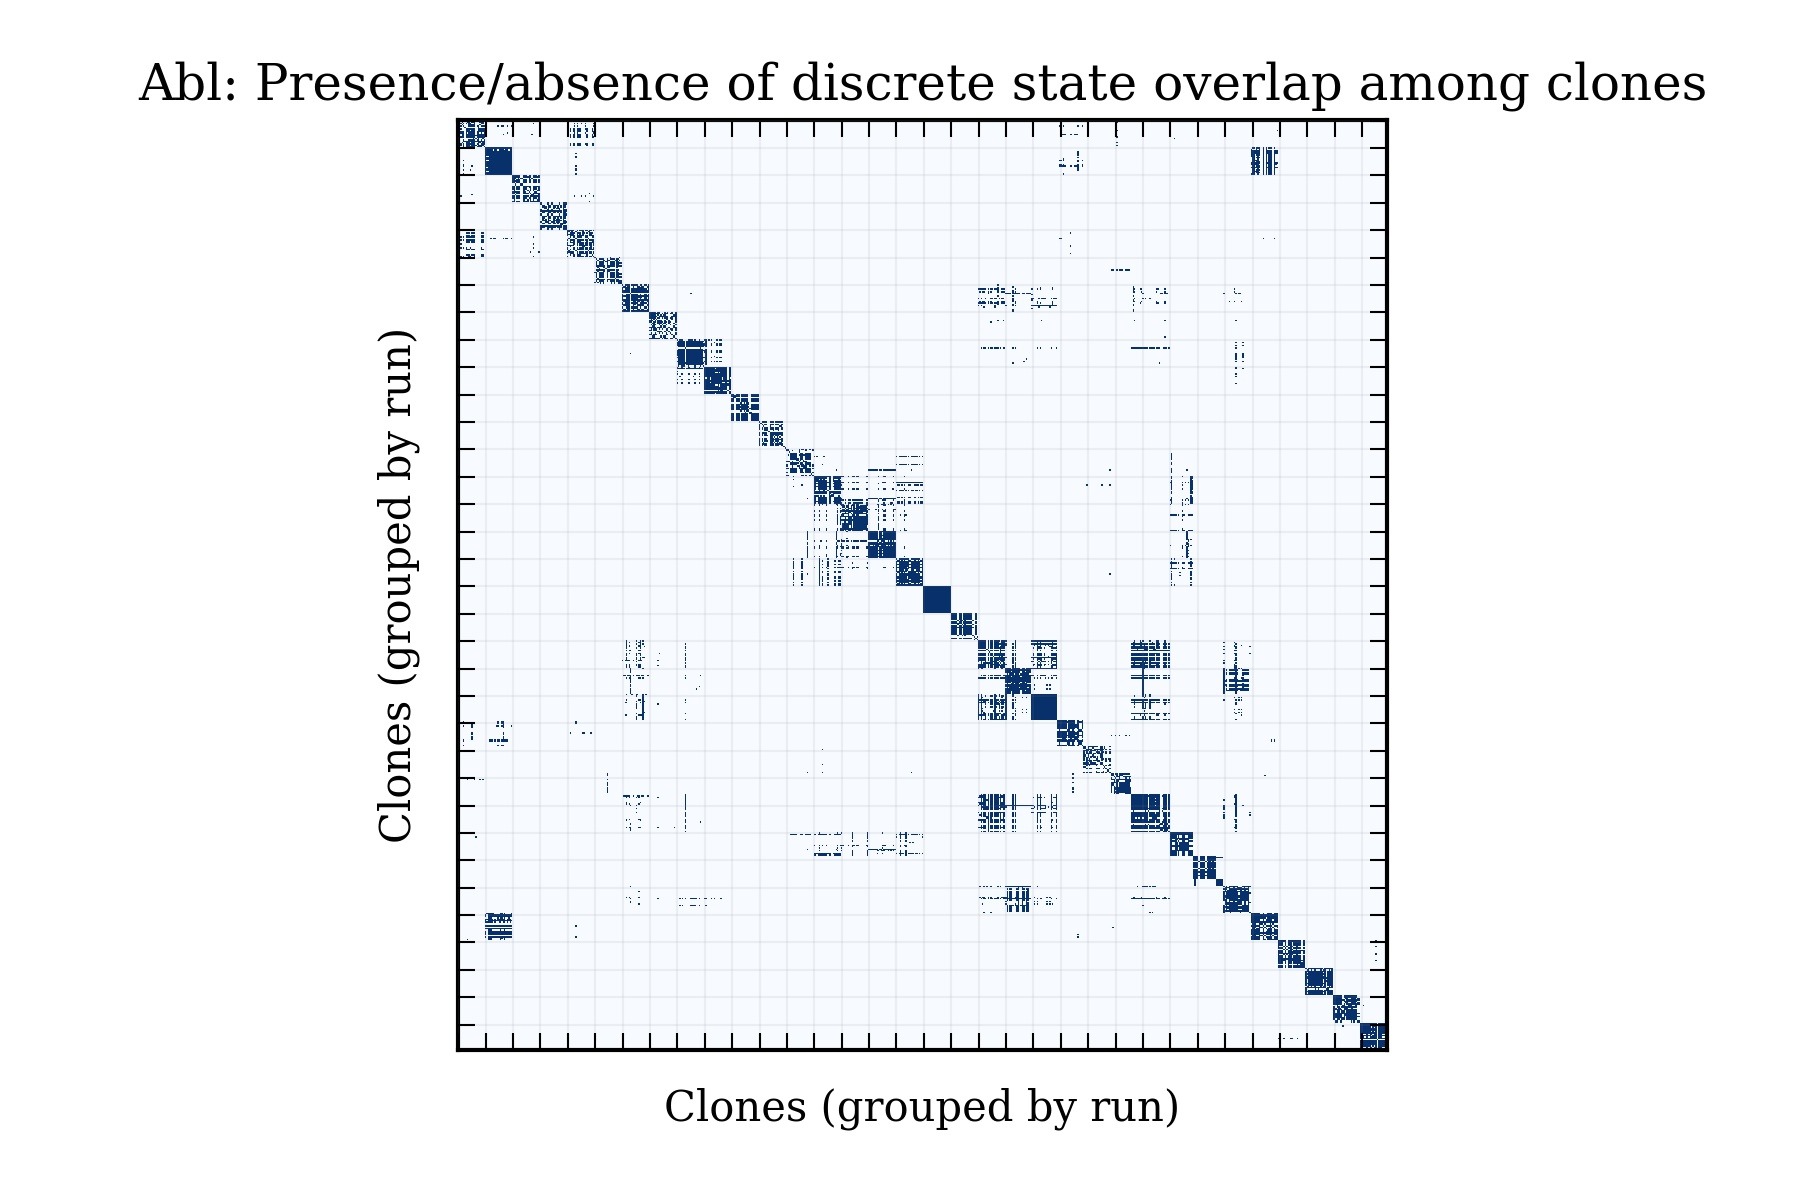

In [3]:
from IPython.display import Image
Image('overlap_matrix_abl.jpg',retina=True)

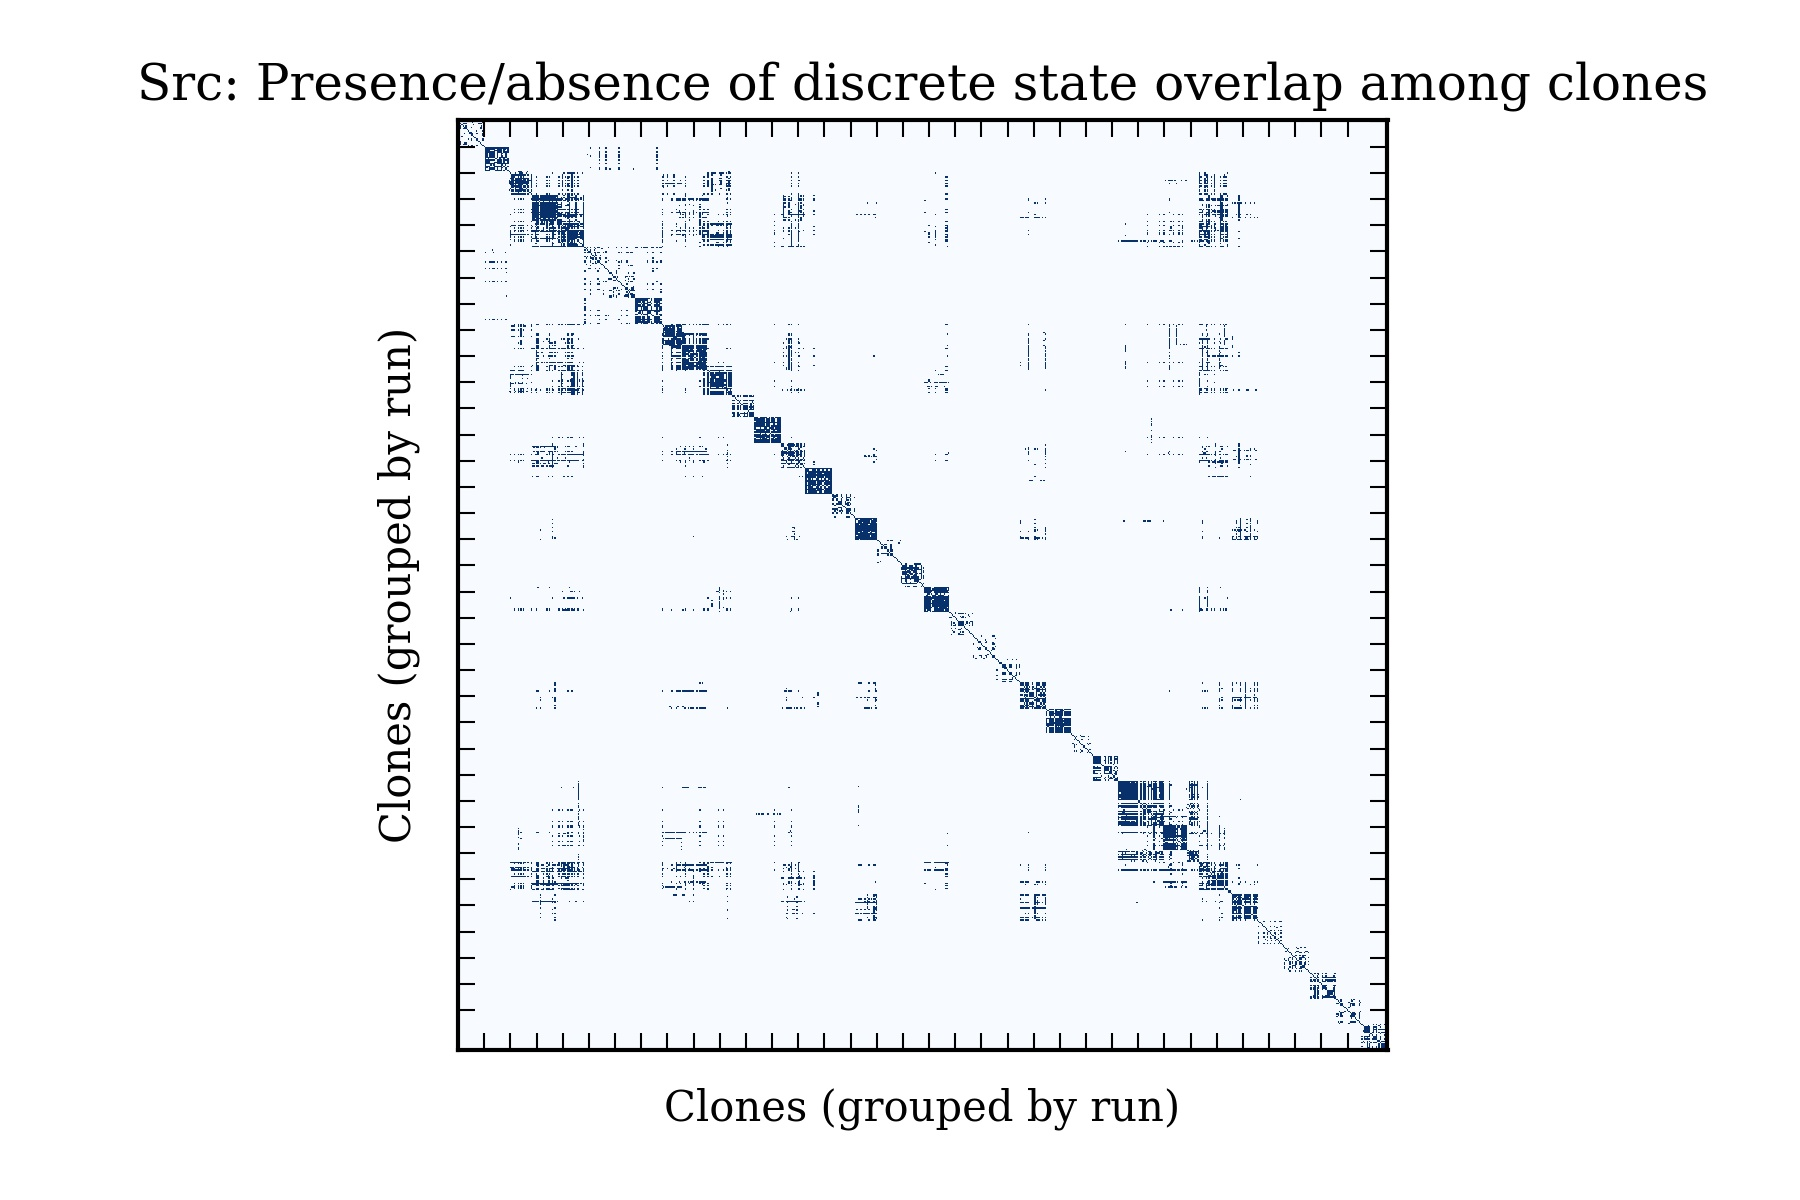

In [4]:
Image('overlap_matrix_src.jpg',retina=True)

In [1]:
# discriminating runs

# idea: use decision tree classification to decide predict run label

# use fs peptide first, since I got rid of the src / abl data

from msmbuilder.example_datasets import FsPeptide
trajs = FsPeptide().get().trajectories

from msmbuilder.featurizer import DihedralFeaturizer
dih_model = DihedralFeaturizer()
featurized = dih_model.fit_transform(trajs)

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [12]:
def featurized_to_XY(featurized):
    X = np.vstack(featurized)
    y = np.hstack(i*np.ones(len(x)) for i,x in enumerate(featurized))
    return X,y

In [20]:
X,y = featurized_to_XY(featurized)
X.shape,y.shape

((280000, 84), (280000,))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [26]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
dt.score(X,y)

0.44834642857142859